# Analysis of COVID-19 Cases per County in the United States
#### Data retrieved from the Center for Systems Science and Engineering at Johns Hopkins University on May 18

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
cases = pd.read_csv("coviddata_johnshopkins_may18.txt")

In [5]:
cases.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,151,151,151,151,152,152,152,154,154,154
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,15,16,16,19,19,19,19,19,21,21
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,2156,2173,2198,2256,2299,2329,2427,2542,2589,2646
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,68,68,69,69,69,69,69,69,69,69


In [6]:
USA = cases.loc[cases['iso3'] == 'USA']
dates = USA.columns[11:]

In [7]:
# Function to plot the cumulative number of records for a specified county-state combo
def cumulative(county, state):
    fig = plt.figure(figsize=(18,12))
    plt.plot(USA[(USA.Admin2 == county) & (USA.Province_State == state)].iloc[0,11:])
    plt.xticks(rotation = 60)
    plt.title('Cumulative Number of Cases for {}, {}'.format(county, state))
    plt.ylabel('Number of Cases')
    #return np.cumsum(USA.loc[USA.Admin2 == county][USA.Province_State == state].iloc[0,11:])

Text(0, 0.5, 'Cumulative Number of Cases')

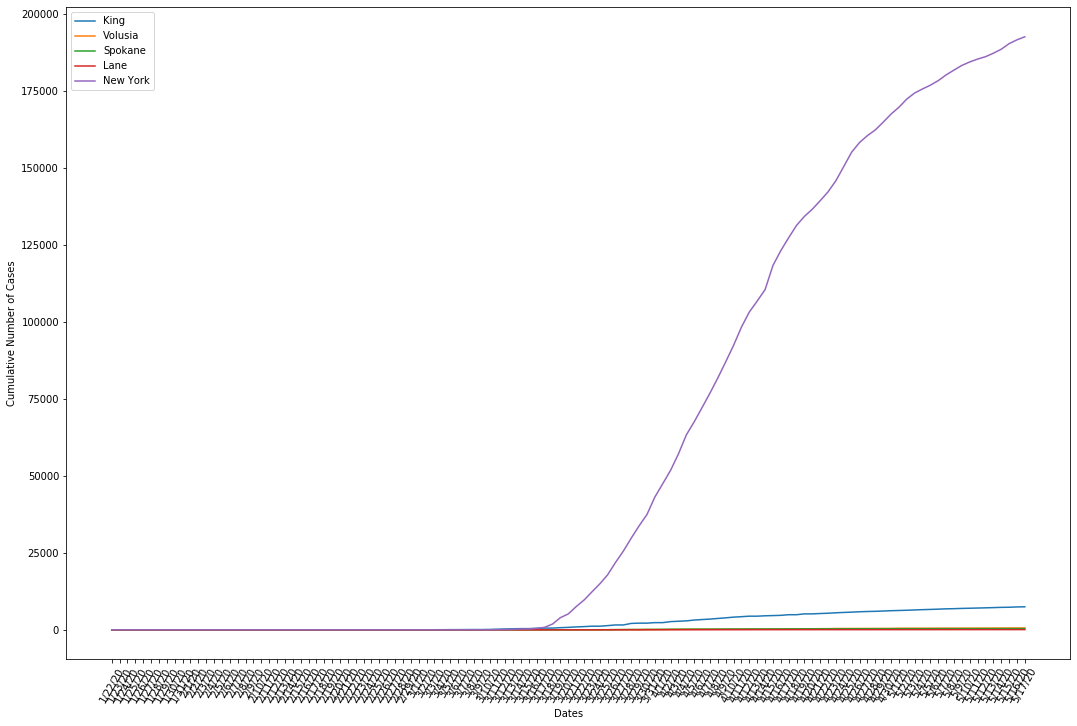

In [7]:
# Plot Multiple Counties
fig,ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 60)
plt.plot(USA[(USA.Admin2 == 'King') & (USA.Province_State == 'Washington')].iloc[0,11:], label = 'King')
plt.plot(USA[(USA.Admin2 == 'Volusia') & (USA.Province_State == 'Florida')].iloc[0,11:], label = 'Volusia')
plt.plot(USA[(USA.Admin2 == 'Spokane') & (USA.Province_State == 'Washington')].iloc[0,11:], label = 'Spokane')
plt.plot(USA[(USA.Admin2 == 'Lane') & (USA.Province_State == 'Oregon')].iloc[0,11:], label = 'Lane')
plt.plot(USA[(USA.Admin2 == 'New York') & (USA.Province_State == 'New York')].iloc[0,11:], label = 'New York')

legend = ax.legend(loc='upper left') # have a legend box (since now we have colors) and place it top left so it doesn't obscure things
#plt.title('CGPA vs Chance of Admission, Differentiated on Research')
plt.xlabel('Dates')
plt.ylabel('Cumulative Number of Cases')

Text(0, 0.5, 'Cumulative Number of Cases')

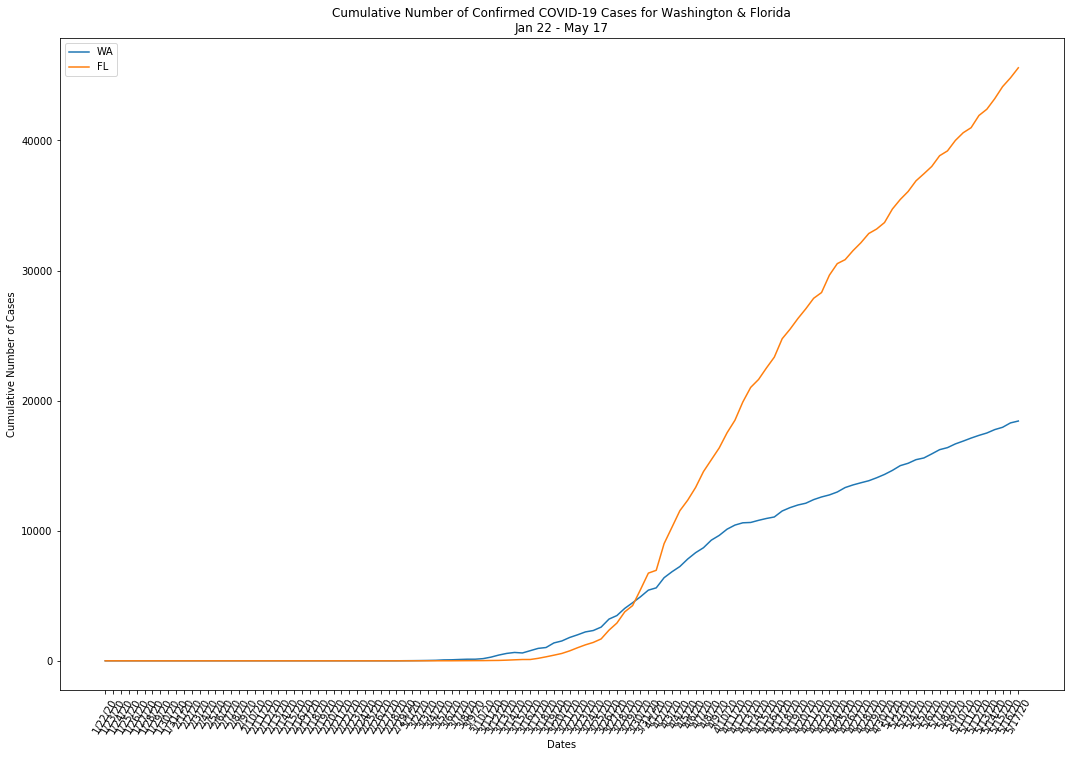

In [31]:
# Plot Multiple States
fig,ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 60)
plt.plot(np.sum(USA[USA.Province_State == 'Washington'].iloc[:,11:]), label = 'WA')
plt.plot(np.sum(USA[USA.Province_State == 'Florida'].iloc[:,11:]), label = 'FL')

legend = ax.legend(loc='upper left') # have a legend box (since now we have colors) and place it top left so it doesn't obscure things
plt.title('Cumulative Number of Confirmed COVID-19 Cases for Washington & Florida\nJan 22 - May 17')
plt.xlabel('Dates')
plt.ylabel('Cumulative Number of Cases')

Text(0, 0.5, 'Cumulative Number of Cases')

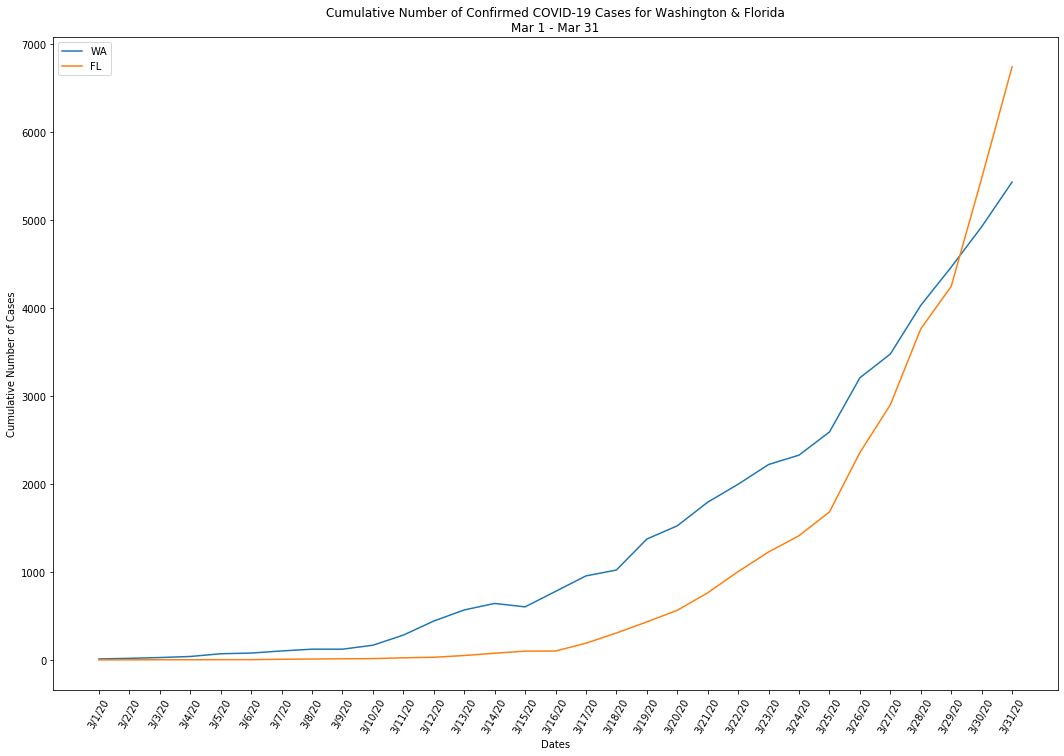

In [58]:
# Plot Multiple States
fig,ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 60)
plt.plot(np.sum(USA[USA.Province_State == 'Washington'].iloc[:,50:81]), label = 'WA')
plt.plot(np.sum(USA[USA.Province_State == 'Florida'].iloc[:,50:81]), label = 'FL')

legend = ax.legend(loc='upper left') # have a legend box (since now we have colors) and place it top left so it doesn't obscure things
plt.title('Cumulative Number of Confirmed COVID-19 Cases for Washington & Florida\nMar 1 - Mar 31')
plt.xlabel('Dates')
plt.ylabel('Cumulative Number of Cases')

In [8]:
def percentage_growth(county, state):
    first_occur = [USA[(USA.Admin2 == county) & (USA.Province_State == state)].iloc[0,11:][i] != 0 for i in range(len(dates))]
    impacted_dates = USA[(USA.Admin2 == county) & (USA.Province_State == state)].iloc[0,11:][first_occur]
    final = max(impacted_dates)
    first = min(impacted_dates)
    return round(((final - first)/first)*100,1)

In [9]:
percentage_growth('Spokane', 'Washington')

13233.3

In [40]:
def percentage_growth_state(state):
    first_occur = [states[states.Province_State == state].iloc[0,11:][i] != 0 for i in range(len(states.columns[11:]))]
    impacted_dates = states[states.Province_State == state].iloc[0,11:][first_occur]
    final = max(impacted_dates)
    first = min(impacted_dates)
    return round(((final - first)/first)*100,1)

In [28]:
states = USA.groupby('Province_State', as_index = False).sum()

In [60]:
#percentage_growth_state('Washington'), percentage_growth_state('Florida')
np.max(states[states['Province_State'] == 'Florida'].iloc[0,11:]), 
np.max(states[states['Province_State'] == 'Washington'].iloc[0,11:])

(45588, 18433)

In [13]:
# Function to plot daily percentage change in new cases
def daily_change(county, state, metric):
    # Boolean mask of when the county had its first case
    first_occur = [USA[(USA.Admin2 == county) & (USA.Province_State == state)].iloc[0,11:][i] != 0 for i in range(len(dates))]
    # Reduce analysis to only the dates when the county had an infection
    impacted_dates = USA[(USA.Admin2 == county) & (USA.Province_State == state)].iloc[0,11:][first_occur]   
    
    if metric == 'percentage':
        # Plot the results
        fig = plt.figure(figsize=(18,12))
        plt.plot(dates[first_occur][:-1], [((impacted_dates[i+1]-impacted_dates[i])/impacted_dates[i])*100 for i in range(len(impacted_dates)-1)])
        plt.xticks(rotation = 60)
        plt.title('Percentage Change in Number of New Cases from the Previous Day for {}, {}'.format(county, state))
        plt.ylabel('Percentage Change in Number of New Cases from Previous Day')
    elif metric == 'daily':
        fig = plt.figure(figsize=(18,12))
        plt.plot(dates[first_occur][:-1], [impacted_dates[-i]-impacted_dates[-i-1] for i in range(len(impacted_dates))][::-1][:-1])
        plt.xticks(rotation = 60)
        plt.title('Change in Number of New Cases from the Previous Day for {}, {}'.format(county, state))
        plt.ylabel('Change in Number of New Cases from Previous Day')

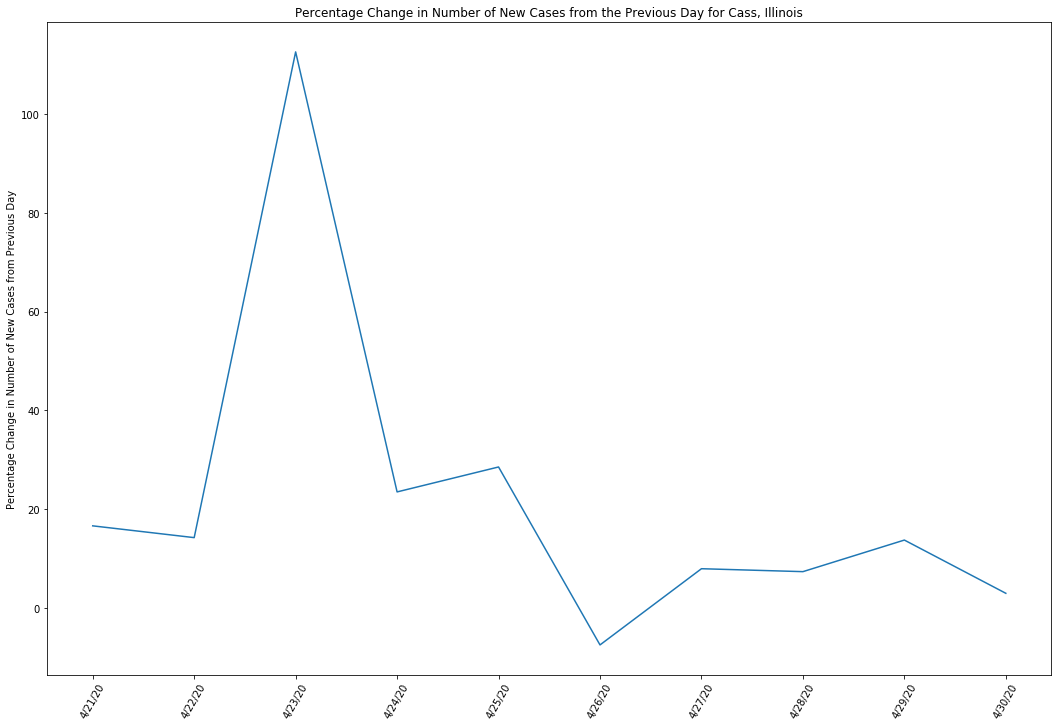

In [14]:
daily_change('Cass', 'Illinois', 'percentage')

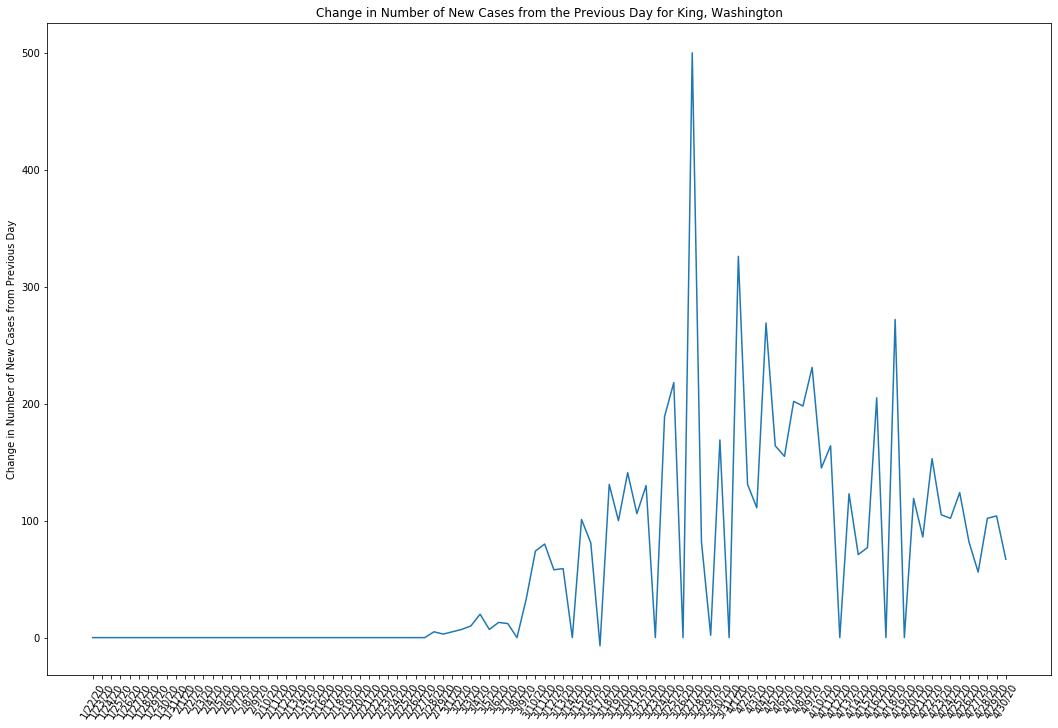

In [15]:
daily_change('King', 'Washington', 'daily')

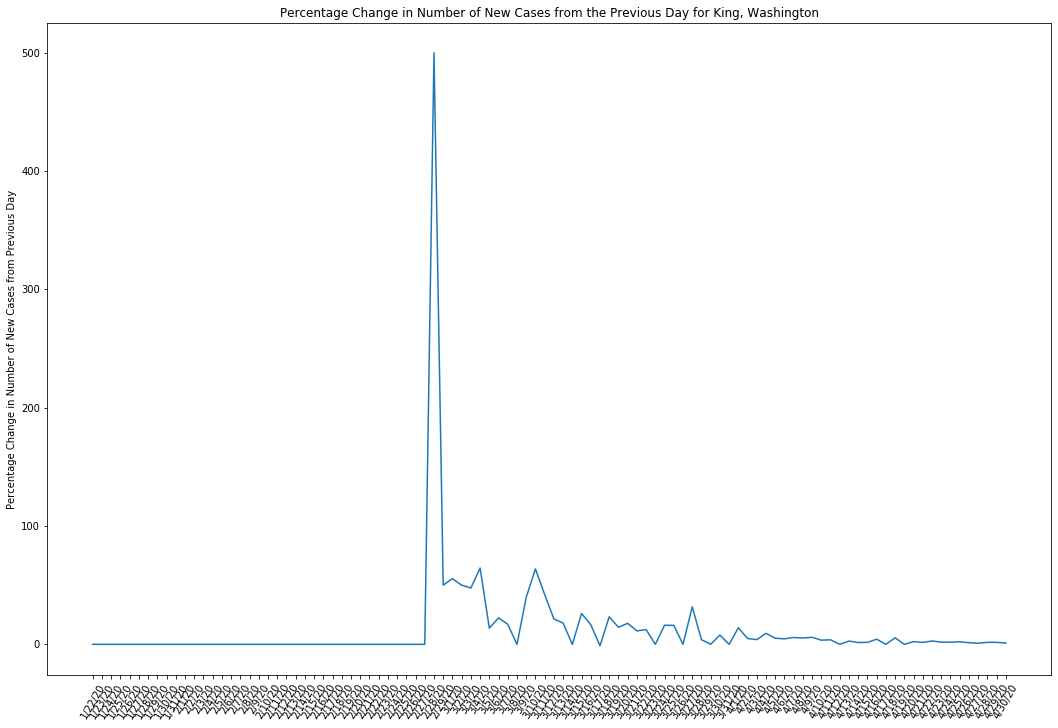

In [16]:
daily_change('King', 'Washington', 'percentage')

In [17]:
# Return the compound average growth rate
def cagr(county, state):
    # Boolean mask of when the county had its first case
    first_occur = [USA[(USA.Admin2 == county) & (USA.Province_State == state)].iloc[0,11:][i] != 0 for i in range(len(dates))]
    # Reduce analysis to only the dates when the county had an infection
    impacted_dates = USA[(USA.Admin2 == county) & (USA.Province_State == state)].iloc[0,11:][first_occur]   
  
    # Numbers needed to calculate cagrt
    start = impacted_dates[0] 
    end = impacted_dates[-1]
    days = len(impacted_dates)
    
    return round(((end / start) ** (1/(days - 1)) - 1),2)*100

In [18]:
cagr('Unassigned', 'Mississippi')

567.0

### Analyze multiple counties

In [19]:
# Group dataframe by county and state to avoid instances like King county Washington and King county Texas
grouped = USA.groupby(['Admin2', 'Province_State']).mean().reset_index()

# Create a new column combining these values
grouped['County_State'] = grouped['Admin2'] + ' ' + grouped['Province_State']

In [20]:
# Create a dictionary of County_State:CAGR(compound average growth rate) pairs
county_cagrs = {}
for i in range(len(grouped.County_State)):
    first_occur = grouped.iloc[i,7:-1] != 0
    impacted_dates = grouped.iloc[i,7:-1][first_occur]
    if len(impacted_dates) > 0:
        start = impacted_dates[0] 
        end = impacted_dates[-1]
        days = len(impacted_dates)
        if end > 0:
            if days > 2:
                county_cagrs.update({grouped.County_State[i]: round(((end / start) ** (1/(days - 1)) - 1),2)*100})

In [21]:
# Turn dict into a counter object
county_cagrs = Counter(county_cagrs)

# Print the top n values
for k, v in county_cagrs.most_common(10):
    print(k,v)

Unassigned Mississippi 567.0
Unassigned Texas 279.0
Mariposa California 135.0
Unassigned Virginia 73.0
Day South Dakota 59.0
Ochiltree Texas 52.0
Mississippi Missouri 45.0
Unassigned New York 44.0
Dakota Nebraska 41.0
Unassigned New Mexico 41.0


### Chaning shape of time series

In [22]:
# Only need the 'combined_key' which is County, State, US
# Use melt to turn the n-columns of dates and their values into 1 column of dates and one of values
USA_reshaped = USA.iloc[:,10:].melt(['Combined_Key'], value_name = 'Cases', var_name='Date')
# Show what new df looks like
USA_reshaped.loc[USA_reshaped['Combined_Key'] == 'King, Washington, US']

,Combined_Key,Date,Cases
2969,"King, Washington, US",1/22/20,1
6225,"King, Washington, US",1/23/20,1
9481,"King, Washington, US",1/24/20,1
12737,"King, Washington, US",1/25/20,1
15993,"King, Washington, US",1/26/20,1
...,...,...,...
315545,"King, Washington, US",4/27/20,5945
318801,"King, Washington, US",4/28/20,6001
322057,"King, Washington, US",4/29/20,6103
325313,"King, Washington, US",4/30/20,6207


In [25]:
# Calculate total cases for one county
max(USA_reshaped.loc[USA_reshaped['Combined_Key'] == 'King, Washington, US']['Cases'])

6274

In [53]:
# Calculate total cases for each county
total_cases_per_county = USA_reshaped.groupby('Combined_Key', as_index = False).max()
#total_cases_per_county.loc[total_cases_per_county['Combined_Key'] == 'Richmond, New York, US']

,Combined_Key,Date,Cases
2481,"Richmond, New York, US",5/1/20,0


#### Total number of cases in the United States*
##### Does not account for those who have recovered or died. This is a total of everyone that has tested positive at some point.

In [54]:
sum(total_cases_per_county['Cases'])

1112891

## Source
###### https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports
###### https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv

### Annex

In [34]:
# Pull out county and state from USA_reshaped
# County
[USA_reshaped['Combined_Key'][i].split()[0] for i in range(10)]
# State
[USA_reshaped['Combined_Key'][i].split()[1] for i in range(10)]

['Alabama,',
 'Alabama,',
 'Alabama,',
 'Alabama,',
 'Alabama,',
 'Alabama,',
 'Alabama,',
 'Alabama,',
 'Alabama,',
 'Alabama,']